This tutorial includes simple linear regression using gradient descent and OLS (Ordinary Least Sqaure) 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


In [4]:
df.describe()

,Weight,Height
count,23.000000,23.000000
mean,73.826087,158.391304
std,17.872407,19.511626
min,45.000000,120.000000
25%,59.000000,142.500000
50%,78.000000,162.000000
75%,86.000000,175.000000
max,105.000000,183.000000


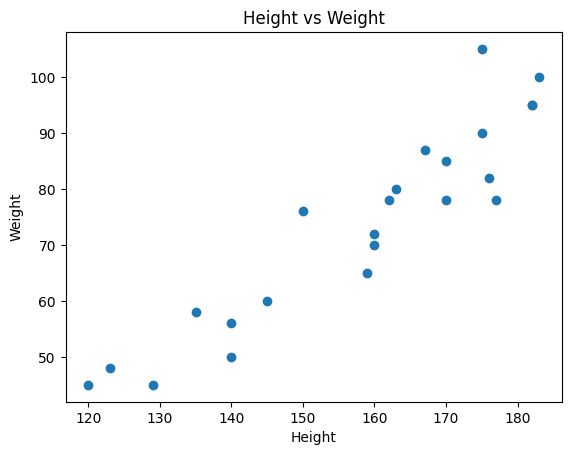

In [5]:
plt.scatter(df['Height'], df['Weight'])
plt.xlabel('Height')
plt.ylabel('Weight')
plt.title('Height vs Weight')
plt.show()

In [6]:
df.corr() # Highly correlated features (linear relationship)

,Weight,Height
Weight,1.000000,0.931142
Height,0.931142,1.000000


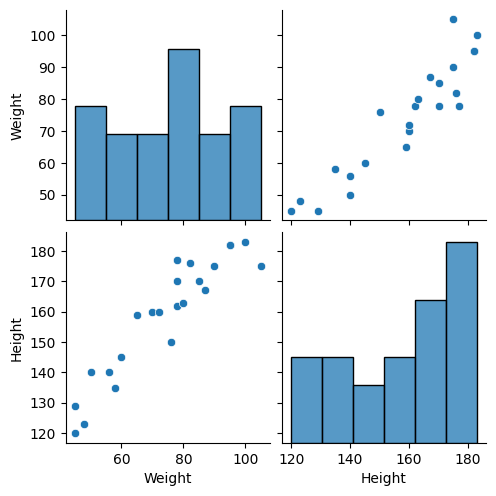

In [7]:
import seaborn as sns
sns.pairplot(df)

In [9]:
#independent (Always should be DataFrame/2-Dimensional array) and dependent (Always should be  Series/1-dimensional array) features
x = df[['Weight']] #independent feature
y = df['Height']  #dependent feature

x.shape,y.shape


((23, 1), (23,))

In [10]:
#Train Test Split
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42)
xtrain.shape,xtest.shape,ytrain.shape,ytest.shape

((18, 1), (5, 1), (18,), (5,))

In [14]:
#Standardization
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
xtrain = scaler.fit_transform(xtrain)
xtest = scaler.transform(xtest)
# why fit_transform and transform? =>  so that we can use the same scaler for both training and testing data and the test data is not leaked into the training data.


In [15]:
xtrain,xtest

(array([[ 1.73689094],
        [-0.92026952],
        [ 1.4542143 ],
        [ 0.21043706],
        [-1.48562281],
        [ 1.17153765],
        [-1.6552288 ],
        [-0.80719886],
        [-0.24184557],
        [ 0.0973664 ],
        [-1.37255215],
        [-1.03334018],
        [-0.12877492],
        [ 0.88886101],
        [ 0.43657837],
        [ 0.60618436],
        [ 0.71925502],
        [ 0.32350772]]),
 array([[ 0.21043706],
        [ 0.21043706],
        [-1.6552288 ],
        [ 1.17153765],
        [-0.52452222]]))

In [17]:
from sklearn.linear_model import LinearRegression
linear = LinearRegression()
linear.fit(xtrain,ytrain)
print(f"Coefficient: {linear.coef_}")
print(f"Intercept: {linear.intercept_}")

Coefficient: [17.03440872]
Intercept: 157.5


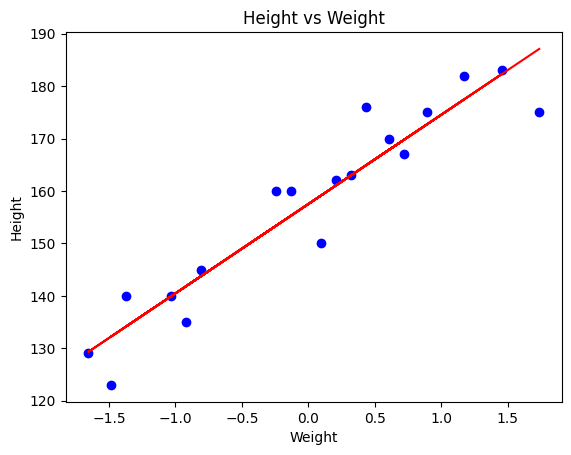

In [19]:
plt.scatter(xtrain,ytrain,color='blue')
plt.plot(xtrain,linear.predict(xtrain),color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()


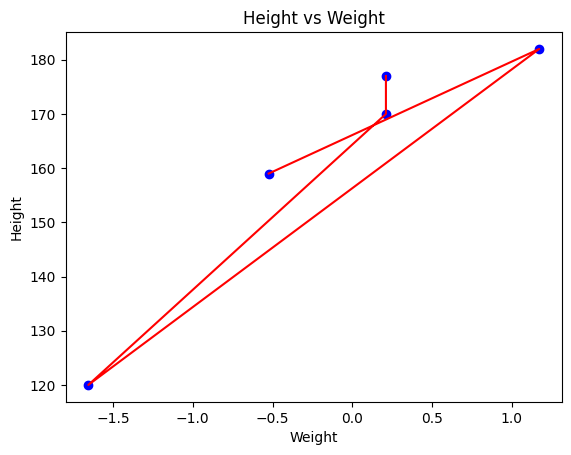

In [ ]:
#predicting the test data
ypred = linear.predict(xtest)
plt.scatter(xtest,ytest,color='blue')
plt.plot(xtest,ytest,color='red')
plt.xlabel('Weight')
plt.ylabel('Height')
plt.title('Height vs Weight')
plt.show()

In [ ]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(ytest,ypred)
mae = mean_absolute_error(ytest,ypred)
rmse = np.sqrt(mse)
r2 = r2_score(ytest,ypred)
print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R2 Score: {r2}")

#adjusted R2 Score
n = len(ytest)
p = len(linear.coef_)
adjusted_r2 = 1 - (1-r2)*(n-1)/(n-p-1)
print(f"Adjusted R2 Score: {adjusted_r2}")



MSE: 109.77592599051658
MAE: 9.822657814519232
RMSE: 10.477400726827078
R2 Score: 0.776986986042344
Adjusted R2 Score: 0.7026493147231252


Testing for new data[1435.08065393]


In [28]:
#OLS (Ordinary Least Sqaure) 
from statsmodels.api import OLS
model = OLS(ytrain,xtrain)
model = model.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 Height   R-squared (uncentered):                   0.012
Model:                            OLS   Adj. R-squared (uncentered):             -0.047
Method:                 Least Squares   F-statistic:                             0.1986
Date:                Mon, 20 Oct 2025   Prob (F-statistic):                       0.661
Time:                        15:18:22   Log-Likelihood:                         -116.62
No. Observations:                  18   AIC:                                      235.2
Df Residuals:                      17   BIC:                                      236.1
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            17.0344     38.226      0.446      0.661     -63.616      97.684
==============================================================================
Omnibus:                        0.849   Durbin-Watson:                   0.003
Prob(Omnibus):                  0.654   Jarque-Bera (JB):                0.661
Skew:                          -0.428   Prob(JB):                        0.718
Kurtosis:                       2.614   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
# Prediction for new data point
linear.predict(scaler.transform([[75]]))


array([1435.08065393])